*best viewed in [nbviewer](https://nbviewer.jupyter.org/github/CambridgeSemiticsLab/BH_time_collocations/blob/master/results/notebooks/3_head_lexemes.ipynb)*

# Time Adverbial Distribution and Collocations
## Head Lexemes
### Cody Kingham
<a href="../../../docs/sponsors.md"><img height=200px width=200px align="left" src="../../../docs/images/CambridgeU_BW.png"></a>

In [1]:
! echo "last updated:"; date

last updated:
Thu  2 Jul 2020 14:34:38 BST


## Introduction

This notebook will produce data for my in-progress article on time adverbial components. 

<hr>

# Python

Now we import the modules and data needed for the analysis.

In [2]:
# see .py's for variables
from config import *
from get_hmod_sample import hm_df as head_mod_df

## Use fine-grained sample

In [3]:
funct_counts = head_mod_df.function.value_counts()

funct_counts

Subj    26540
Cmpl    17444
Objc    16684
Adju     6824
Time     3493
Loca     2135
Name: function, dtype: int64

In [4]:
funct_counts.sum()

73120

# Head and Modifier Sample

## Function Head Lexemes

In [5]:
head2funct = pd.pivot_table(
    head_mod_df,
    index='head_etcbc',
    columns='function',
    aggfunc='size',
    fill_value=0
)

print(head2funct.shape)
head2funct.head()

(4220, 6)


function,Adju,Cmpl,Loca,Objc,Subj,Time
head_etcbc,,,,,,
<B/,6,6,0,4,7,0
<B=/,0,0,0,0,1,0
<B==/,0,1,0,0,0,0
<BD/,21,88,0,42,147,0
<BDH/,17,12,0,19,10,0


In [18]:
# get illustrative sample


head2funct.loc[['>LHJM/', 'JWM/', 'HR/']].to_clipboard()

head2funct.loc[['>LHJM/', 'JWM/', 'HR/']]

function,Adju,Cmpl,Loca,Objc,Subj,Time
head_etcbc,,,,,,
>LHJM/,34,203,0,100,434,0
JWM/,47,34,0,81,166,1353
HR/,13,162,72,29,48,0


In [17]:
head_mod_df[
   (head_mod_df.function == 'Cmpl')
   & (head_mod_df.head_etcbc == '>LHJM/')
]

,function,ref,book,ph_type,head,text,token,clause,sentence,classi,...,ord_str,cl_kind,verb,tense,verb_lex,book_sbl,lang,genre,nom_marks,has_nom
node,,,,,,,,,,,,,,,,,,,,,
652302,Cmpl,Gen 3:8,Genesis,prep_ph,אלהים,מִפְּנֵי֙ יְהוָ֣ה אֱלֹהִ֔ים,מן.פנה.יהוה.אלהים,וַיִּתְחַבֵּ֨א הָֽאָדָ֜ם וְאִשְׁתֹּ֗ו מִפְּנֵי...,וַיִּתְחַבֵּ֨א הָֽאָדָ֜ם וְאִשְׁתֹּ֗ו מִפְּנֵי...,single.prep,...,NaN,VC,True,wyqtl,חבא,Gen,Hebrew,prose,1,True
652987,Cmpl,Gen 5:22,Genesis,prep_ph,אלהים,אֶת־הָֽאֱלֹהִ֗ים,את.ה.אלהים,וַיִּתְהַלֵּ֨ךְ חֲנֹ֜וךְ אֶת־הָֽאֱלֹהִ֗ים שְׁל...,וַיִּתְהַלֵּ֨ךְ חֲנֹ֜וךְ אֶת־הָֽאֱלֹהִ֗ים אַֽח...,single.prep.definite,...,NaN,VC,True,wyqtl,הלך,Gen,Hebrew,list,2,True
653001,Cmpl,Gen 5:24,Genesis,prep_ph,אלהים,אֶת־הָֽאֱלֹהִ֑ים,את.ה.אלהים,וַיִּתְהַלֵּ֥ךְ חֲנֹ֖וךְ אֶת־הָֽאֱלֹהִ֑ים,וַיִּתְהַלֵּ֥ךְ חֲנֹ֖וךְ אֶת־הָֽאֱלֹהִ֑ים,single.prep.definite,...,NaN,VC,True,wyqtl,הלך,Gen,Hebrew,list,2,True
653177,Cmpl,Gen 6:9,Genesis,prep_ph,אלהים,אֶת־הָֽאֱלֹהִ֖ים,את.ה.אלהים,אֶת־הָֽאֱלֹהִ֖ים הִֽתְהַלֶּךְ־נֹֽחַ׃,אֶת־הָֽאֱלֹהִ֖ים הִֽתְהַלֶּךְ־נֹֽחַ׃,single.prep.definite,...,NaN,VC,True,qtl,הלך,Gen,Hebrew,prose,2,True
655794,Cmpl,Gen 17:18,Genesis,prep_ph,אלהים,אֶל־הָֽאֱלֹהִ֑ים,אל.ה.אלהים,וַיֹּ֥אמֶר אַבְרָהָ֖ם אֶל־הָֽאֱלֹהִ֑ים,וַיֹּ֥אמֶר אַבְרָהָ֖ם אֶל־הָֽאֱלֹהִ֑ים,single.prep.definite,...,NaN,VC,True,wyqtl,אמר,Gen,Hebrew,prose,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903244,Cmpl,2 Chr 32:19,2_Chronicles,prep_ph,אלהים,אֶל־אֱלֹהֵ֖י יְרוּשָׁלִָ֑ם,אל.אלהים.ירושׁלם,וַֽיְדַבְּר֔וּ אֶל־אֱלֹהֵ֖י יְרוּשָׁלִָ֑ם כְּע...,וַֽיְדַבְּר֔וּ אֶל־אֱלֹהֵ֖י יְרוּשָׁלִָ֑ם כְּע...,single.prep.genitive,...,NaN,VC,True,wyqtl,דבר,2 Chr,Hebrew,prose,2,True
903565,Cmpl,2 Chr 33:12,2_Chronicles,prep_ph,אלהים,מִלִּפְנֵ֖י אֱלֹהֵ֥י אֲבֹתָֽיו׃,מן.ל.פנה.אלהים.אב,וַיִּכָּנַ֣ע מְאֹ֔ד מִלִּפְנֵ֖י אֱלֹהֵ֥י אֲבֹת...,וַיִּכָּנַ֣ע מְאֹ֔ד מִלִּפְנֵ֖י אֱלֹהֵ֥י אֲבֹת...,single.prep.genitive,...,NaN,VC,True,wyqtl,כנע,2 Chr,Hebrew,prose,2,True
904032,Cmpl,2 Chr 34:25,2_Chronicles,prep_ph,אלהים,לֵֽאלֹהִ֣ים אֲחֵרִ֔ים,ל.אלהים.אחר,וַֽיְקַטְּרוּ֙ לֵֽאלֹהִ֣ים אֲחֵרִ֔ים,הִנְנִ֨י מֵבִ֥יא רָעָ֛ה עַל־הַמָּקֹ֥ום הַזֶּ֖ה...,single.prep.øanchor.adjective,...,NaN,VC,True,wyqtl,קטר,2 Chr,Hebrew,prose,1,True


### Function head lexeme diversity

Determine how many head lexemes per 100 uses are found for each function.<br>
Adapted from ["Normalizing Word Counts"](http://www.thegrammarlab.com/?nor-portfolio=normalizing-word-counts).

In [8]:
is_attested = (head2funct > 0) * 1
n_attested = is_attested.sum()
head_per_100 = (n_attested / head2funct.sum()) * 100 # normalize per 100 uses of the function
head_per_100 = head_per_100.sort_values()

In [9]:
n_attested

function
Adju    1472
Cmpl    2035
Loca     353
Objc    2214
Subj    2408
Time     116
dtype: int64

In [10]:
head2funct.sum()

function
Adju     6824
Cmpl    17444
Loca     2135
Objc    16684
Subj    26540
Time     3493
dtype: int64

In [11]:
head_per_100

function
Time     3.320928
Subj     9.073097
Cmpl    11.665902
Objc    13.270199
Loca    16.533958
Adju    21.570926
dtype: float64

In [12]:
head2funct.sum(1).sort_values(ascending=False).head(25)

head_etcbc
JHWH/     3212
JWM/      1681
BN/       1397
>RY/      1378
>JC/      1169
JD/       1100
BJT/       990
<M/        980
MLK/       918
DBR/       918
HW>        904
>LHJM/     771
>NJ        733
<JN/       700
CM/        689
KL/        663
CM         654
>TH        636
DWD==/     583
JFR>L/     550
MCH=/      537
NPC/       516
<JR/       513
LB/        424
DRK/       423
dtype: int64

### Association: how associated are given head words with their attested function?

Apply Fisher's exact test for statistical significance between given functions and given head lexemes.

In [13]:
fish_head, odds_head = mystats.apply_fishers(head2funct, 0, 1)
fish_head.head()

,Adju,Cmpl,Loca,Objc,Subj,Time
<B/,1.781810,0.092863,0.000000,-0.095101,-0.175581,-0.203661
<B=/,0.000000,0.000000,0.000000,0.000000,0.440135,0.000000
<B==/,0.000000,0.622390,0.000000,0.000000,0.000000,0.000000
<BD/,-0.711123,1.611689,-3.447374,-3.639347,5.388567,-6.081207
<BDH/,4.850047,-0.189689,-0.377814,1.076157,-2.629960,-0.934505


In [19]:
# look at number of Fisher values with positive statistical significance threshold

# total number of heads per function
total_heads = (head2funct != 0) * 1
total_heads = total_heads.sum()

# total number of statistically attracted heads per function
#sig_heads = (fish_head > 1.3) * 1  # multiply by 1 to convert T/F to 0/1 for summing

sig_heads = (fish_head >= 1.3)  * 1
sig_heads = sig_heads.sum()

# proportion of statistically attracted heads per function
sig_heads_prop = sig_heads.div(total_heads).sort_values()

sig_heads_prop

Subj    0.106728
Cmpl    0.128256
Objc    0.178862
Adju    0.214674
Loca    0.453258
Time    0.508621
dtype: float64

### Get top 10 heads per function

In [20]:
def get_lexnode(lex_str):
    """Lookup lexnode for BHSA lex string"""
    node = next(
        l for l in F.otype.s('lex') 
            if F.lex.v(l) == lex_str
    )
    return node

In [21]:
top_10s = [] 

for funct in fish_head.columns:
    scores = fish_head[funct]
    sig_scores = scores[scores >= 1.3]
    top_scores = sig_scores.sort_values(ascending=False)
    raw_scores = top_scores.values
    lexs = [F.voc_lex_utf8.v(get_lexnode(l)) for l in top_scores.index]
    top_10s.append(pd.DataFrame(zip(lexs, raw_scores), columns=('lex', 'score')))

In [41]:
top_10_scores = pd.concat(top_10s, axis=1, keys=fish_head.columns)
top_10_scores.index = top_10_scores.index + 1
top_10_scores.index.name = 'ranks'
top_10_scores.head(20).round(2).to_clipboard()
top_10_scores.head(20)

Adju                      Cmpl                     Loca  \
               lex       score           lex      score           lex   
ranks                                                                   
1             כֵּן  115.761298         אֶרֶץ  82.290400          שָׁם   
2              רֹב   31.285137        בַּיִת  76.246726         אֶרֶץ   
3             פֶּה   30.413410  יְרוּשָׁלִַם  71.548662      מִדְבָּר   
4            חֶרֶב   26.435891          שָׁם  54.502535           הַר   
5            אַיִן   23.690606           יָד  48.510231        שָׂדֶה   
6           בֶּטַח   23.495554     מִצְרַיִם  39.711160        בַּיִת   
7            עַיִן   22.151474          עִיר  29.912315  יְרוּשָׁלִַם   
8        מִשְׁפָּט   15.318522        בָּבֶל  26.762729        מָקֹום   
9      מִשְׁפָּחָה   14.169686         אֹהֶל  26.675101          פֹּה   
10         שָׁלֹום   13.955902        מָקֹום  25.302493         קֶרֶב   
11          עֲבוּר   13.401829           הַר  23.565722       שֶׁמֶשׁ   
12        רִאשֹׁון   12.908637         קֶרֶב  17.760116          חוּץ   
13        שְׁגָגָה   12.363777       תָּוֶךְ  17.499547        שַׁעַר   
14            כֹּל   12.055623          רֵעַ  17.225285        פֶּתַח   
15           מַעַל   12.052625    יִשְׂרָאֵל  16.730142      שָׁמַיִם   
16            עֹור   11.948183       מַחֲנֶה  15.577805      חֶבְרֹון   
17          רָצֹון   11.573148           אָב  14.898408       גְּבוּל   
18           מְאֹד   10.054795          אֵשׁ  13.767248         חֹרֵב   
19       נְעוּרִים    9.635858       דֶּרֶךְ  13.733774       צִיֹּון   
20          שֵׁבֶט    9.474733        פֶּתַח  13.059260     שֹׁמְרֹון   

                      Objc                  Subj                    Time  \
            score      lex      score        lex       score         lex   
ranks                                                                      
1      292.967353      מָה  50.768675      אֲנִי         inf      עַתָּה   
2       80.808829   דָּבָר  49.952201       הוּא         inf        יֹום   
3       63.609770   בֶּגֶד  49.864031     יְהוָה  294.619856      שָׁנָה   
4       40.837426  בְּרִית  43.518609     אַתָּה  282.054211      עֹולָם   
5       22.761774    לֶחֶם  39.800021    אָנֹכִי  150.250258         אָז   
6       19.784807   פָּנֶה  29.990854       הִיא  139.160935         עֵת   
7       19.604576      חֵן  27.660179     אַתֶּם  109.916918     לַיְלָה   
8       19.405622    זָהָב  22.727091     הֵמָּה   93.040814      בֹּקֶר   
9       18.327947   נֶפֶשׁ  20.451494      אִישׁ   92.953135       עֶרֶב   
10      17.989728   כֶּסֶף  20.135521        הֵם   82.605606      חֹדֶשׁ   
11      17.414431  עֶרְוָה  19.786956        מִי   71.859413     תָּמִיד   
12      16.309089     דָּם  19.585509    אֲדֹנָי   66.634056       מָחָר   
13      15.192376    עֹלָה  17.615849     אֵלֶּה   57.191193       אַחַר   
14      15.103418     שֵׁם  16.484955     דָּוִד   44.943880     מָחֳרָת   
15      14.277997  קְטֹרֶת  15.994536  אֲנַחְנוּ   43.182885       מָתַי   
16      13.331963     יָהּ  14.186142     כֹּהֵן   40.008776       נֵצַח   
17      13.227450  בָּשָׂר  13.609065       בֵּן   30.891138      יֹומָם   
18      11.510984  שְׁבוּת  13.480677        זֶה   29.997942        כֵּן   
19      11.189270     טֹוב  13.273486   אֱלֹהִים   28.923112  שִׁלְשֹׁום   
20       9.632911   אֲרֹון  12.425521     מֶלֶךְ   27.071546         אָן   

                   
            score  
ranks              
1             inf  
2             inf  
3      282.730548  
4      222.386974  
5      167.369799  
6      164.492529  
7      151.570565  
8      127.221370  
9       95.964718  
10      76.282693  
11      63.919326  
12      55.379051  
13      44.975121  
14      32.969294  
15      30.551795  
16      28.027812  
17      27.762503  
18      22.235972  
19      18.773105  
20      18.502515

In [23]:
#functs_df[(functs_df.function == 'Adju') & (functs_df.head_etcbc == '>JN/')] 

**Plot head lexeme diversity and association to head**

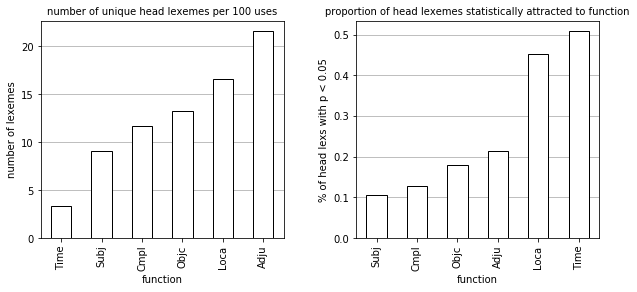

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
plt.subplots_adjust(wspace=0.3)

head_per_100.plot(kind='bar', ax=ax1, color='white', edgecolor='black')
ax1.set_xlabel('function')
ax1.set_ylabel('number of lexemes')
ax1.grid(axis='y')
ax1.set_axisbelow(True)
ax1.set_title('number of unique head lexemes per 100 uses', size=10)

sig_heads_prop.plot(kind='bar', ax=ax2, color='white', edgecolor='black')
ax2.set_xlabel('function')
ax2.set_ylabel('% of head lexs with p < 0.05')
ax2.grid(axis='y')
ax2.set_axisbelow(True) 
ax2.set_title('proportion of head lexemes statistically attracted to function', size=10)
              
savefig('function_head_associations')
plt.show()

In [39]:
# prepare table for paper

head_specs = pd.concat([
    head_per_100[head_per_100.index.sort_values()],
    sig_heads_prop[sig_heads_prop.index.sort_values()],
], 1).T

head_specs.index = ['lex per 100', '% of assoc. lex']

head_specs.round(2).to_clipboard()

head_specs

function,Adju,Cmpl,Loca,Objc,Subj,Time
lex per 100,21.570926,11.665902,16.533958,13.270199,9.073097,3.320928
% of assoc. lex,0.214674,0.128256,0.453258,0.178862,0.106728,0.508621
